In [ ]:
from Game import *
from Game.minimax import *

Version:  0.3.02


## Tapatan Skittles

In [ ]:
def initial_state():
    return Board(3,3)

def count_pieces(state):
    count=0
    for location in range(9):
        if state[location]!=0:
            count=count+1
            
    return count

def row(state,location):
    r,c=state.rc_from_index(location)
    return r
def col(state,location):
    r,c=state.rc_from_index(location)
    return c

def valid_moves(state,player):
    
    moves=[]
    
    if count_pieces(state)<6:  # placement - temporaily set to 9 to behave like ttt
        # placement
        for location in range(9): 
            if state[location]==0:
                moves.append(location)
    else:
        # sliding
        for start in range(9):
            if state[start]!=player:
                continue

            rs,cs=row(state,start),col(state,start)

            for location in range(9):
                end=None

                r,c=row(state,location),col(state,location)

                if state[location]==0:

                    if r-rs==1 and c-cs==0:  # vertical
                        end=location
                    if r-rs==-1 and c-cs==0:  # vertical
                        end=location
                    if r-rs==0 and c-cs==1:  # horizontal
                        end=location
                    if r-rs==0 and c-cs==-1:  # horizontal
                        end=location
                    if r-rs==1 and c-cs==1:  # diagonal
                        end=location
                    if r-rs==-1 and c-cs==-1:  # diagonal
                        end=location
                    if r-rs==1 and c-cs==-1:  # diagonal
                        end=location
                    if r-rs==-1 and c-cs==1:  # diagonal
                        end=location

                    if not end is None:
                        moves.append([start,end])
                pass

        
    return moves
    
    
def update_state(state,player,move):
    if isinstance(move,int):  # placement
        new_state=state
        new_state[move]=player
        
    else:  # sliding
        start,end=move
        new_state=state
        new_state[start]=0
        new_state[end]=player
        
    return new_state

def win_status(state,player):
    # 0  1  2 
    # 3  4  5 
    # 6  7  8 

    if player==1:
        other_player=2
    else:
        other_player=1
    
    if state[0]==state[1]==state[2]==player:
        return "win"
    if state[3]==state[4]==state[5]==player:
        return "win"
    if state[6]==state[7]==state[8]==player:
        return "win"
    if state[0]==state[3]==state[6]==player:
        return "win"
    if state[1]==state[4]==state[7]==player:
        return "win"
    if state[2]==state[5]==state[8]==player:
        return "win"
    if state[0]==state[4]==state[8]==player:
        return "win"
    if state[6]==state[4]==state[2]==player:
        return "win"
    
    if not valid_moves(state,other_player):
        return "stalemate"
    
    return None

def show_state(state,player):
    print(state)

## Agents

In [ ]:
def random_move(state,player):    
    moves=valid_moves(state,player)
    return random.choice(moves)

random_agent=Agent(random_move)

def human_move(state,player):
    print("Player ", player)
    valid_move=False
    while not valid_move:
        move=int(input('What is your move? '))

        if move in valid_moves(state,player):
            valid_move=True
        else:
            print("Illegal move.")

    return move

human_agent=Agent(human_move)

In [ ]:
def minimax_move(state,player):
    values,moves=minimax_values(state,player,display=False)
    return top_choice(moves,values)


minimax_agent=Agent(minimax_move)

In [ ]:
def skittles_move(state,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action
    verbose=info.verbose

    
    if verbose:
        print("\t","Player ",player," is thinking...")
        print("\t","State: ",state)
        print("\t","Table:",S)
        print("\t","Last state,action: ",last_state,last_action)
    
    # make/adjust the table

    if state not in S:
        # add a row to the table for each move
        S[state]=Table()
        moves=valid_moves(state,player)
        for action in moves:
            S[state][action]=3  # number of skittles/beads for each move
    
        if verbose:
            print("\t","State ",state,"unknown...added to table")
            print("\t","Table",S)
    
    move=weighted_choice(S[state])
    if verbose:
        print("\t","Choosing from S[",state,"]",S[state],"....Move: ",move)

    if move is None:  # there are no skittles in this row
        if last_state:
            if verbose:
                print("\t","No possible moves!")
                print("\t","Modifying the table: removing one skittle from (state,action) ",last_state,last_action)
            S[last_state][last_action]=S[last_state][last_action]-1
            
            if verbose:
                print("\t","Table:",S)
                
            if S[last_state][last_action]<0:                
                S[last_state][last_action]=0
                if verbose:
                    print("\t","Negative skittles...fixing.")
                    print("\t","Table:",S)                
        else:
            if verbose:
                print("\t","Started in a bad state ",state,"with no moves and no last state.  Won't modify table.")
                  
                  

        move=random_move(state,player)

    
    return move

def skittles_after(status,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action
    verbose=info.verbose

    if verbose:
        print("\t","End of Game adjustments")
        print("\t","Player ",player," is thinking...")
        print("\t","Win Status: ",status)
        print("\t","Table:",S)
        print("\t","Last state,action: ",last_state,last_action)
        
    if status=='lose':
        if last_state:
            S[last_state][last_action]=S[last_state][last_action]-1
            if S[last_state][last_action]<0:
                S[last_state][last_action]=0
                
            if verbose:
                print("\t","Modifying the table: removing one skittle from (state,action) ",last_state,last_action)
                print("\t","Table:",S)

                
        else:
            if verbose:
                print("\t","No last state, so nothing to learn.")
            
                
    else:
        if verbose:
            print("\t","No adjustments needed.")
        
    # does this double-count the learning if you lose on your own turn        
    

In [ ]:
skittles_agent1=Agent(skittles_move)
skittles_agent1.S=Table()
skittles_agent1.post=skittles_after
skittles_agent1.verbose=True

skittles_agent2=Agent(skittles_move)
skittles_agent2.S=Table()
skittles_agent2.post=skittles_after
skittles_agent2.verbose=True

In [ ]:
g=Game()
g.run(skittles_agent1,skittles_agent2)

====
Game  1
 0  0  0 
 0  0  0 
 0  0  0 

	 Player  1  is thinking...
	 State:   0  0  0 
 0  0  0 
 0  0  0 

	 Table: {}
	 Last state,action:  None None
	 State   0  0  0 
 0  0  0 
 0  0  0 
 unknown...added to table
	 Table {(0, 0, 0, 0, 0, 0, 0, 0, 0): {0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3}}
	 Choosing from S[  0  0  0 
 0  0  0 
 0  0  0 
 ] {0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3} ....Move:  7
Player 1 moves 7
 0  0  0 
 0  0  0 
 0  1  0 

	 Player  2  is thinking...
	 State:   0  0  0 
 0  0  0 
 0  1  0 

	 Table: {}
	 Last state,action:  None None
	 State   0  0  0 
 0  0  0 
 0  1  0 
 unknown...added to table
	 Table {(0, 0, 0, 0, 0, 0, 0, 1, 0): {0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 8: 3}}
	 Choosing from S[  0  0  0 
 0  0  0 
 0  1  0 
 ] {0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 8: 3} ....Move:  6
Player 2 moves 6
 0  0  0 
 0  0  0 
 2  1  0 

	 Player  1  is thinking...
	 State:   0  0  0 
 0  0  0 
 2  1  0 

	 Table: {(0, 0, 0,

[1]

In [ ]:
skittles_agent1=Agent(skittles_move)
skittles_agent1.S=Table()
skittles_agent1.post=skittles_after
skittles_agent1.verbose=False

skittles_agent2=Agent(skittles_move)
skittles_agent2.S=Table()
skittles_agent2.post=skittles_after
skittles_agent2.verbose=False

In [ ]:
%matplotlib inline
from matplotlib.pyplot import figure,plot,grid,legend,xlabel,ylabel,title
from tqdm.notebook import tqdm

In [ ]:
agent1=skittles_agent1
agent1.S=Table()

agent2=skittles_agent2
agent2.S=Table()

In [ ]:
S=Storage()
one,two,ties,N=0,0,0,0

In [ ]:
for i in tqdm(range(30)):
    g=Game(number_of_games=100)
    g.display=False
    
    result=g.run(agent1,agent2)
    one,two,ties,N=one+result.count(1),two+result.count(2),ties+result.count(0),N+len(result)
    
    S+=one/N*100,two/N*100,ties/N*100,N
    
y1,y2,y0,x=S.arrays()    

  0%|          | 0/30 [00:00<?, ?it/s]

Text(0, 0.5, 'Percent')

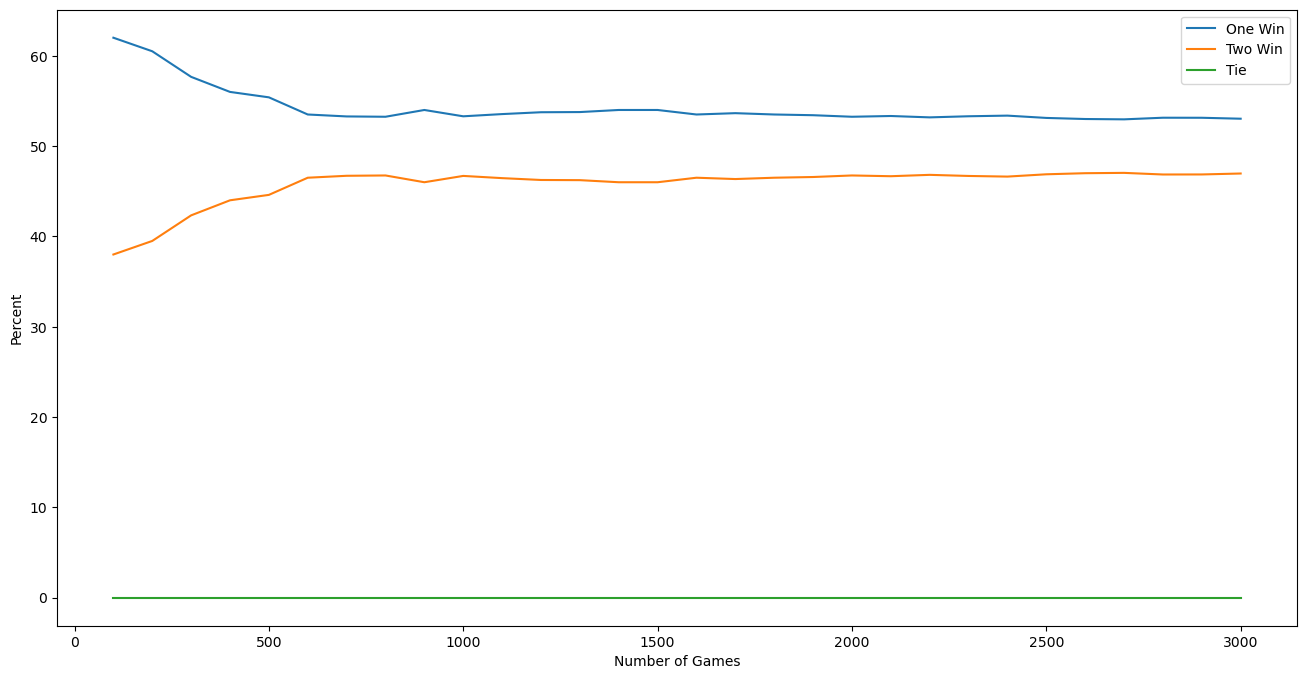

In [ ]:
figure(figsize=(16,8))
plot(x,y1,label='One Win')
plot(x,y2,label='Two Win')
plot(x,y0,label='Tie')
legend()
xlabel('Number of Games')
ylabel('Percent')

In [ ]:
for i in tqdm(range(1000)):
    g=Game(number_of_games=100)
    g.display=False
    
    result=g.run(agent1,agent2)
    one,two,ties,N=one+result.count(1),two+result.count(2),ties+result.count(0),N+len(result)
    
    S+=one/N*100,two/N*100,ties/N*100,N
    
y1,y2,y0,x=S.arrays()   


figure(figsize=(16,8))
plot(x,y1,label='One Win')
plot(x,y2,label='Two Win')
plot(x,y0,label='Tie')
legend()
xlabel('Number of Games')
ylabel('Percent')

  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
SaveTable(skittles_agent1.S,'tapatan skittles1.json')
SaveTable(skittles_agent2.S,'tapatan skittles2.json')

In [ ]:
g=Game(number_of_games=100)
g.display=False
result=g.run(minimax_agent,skittles_agent2)
g.report()

In [ ]:
g=Game(number_of_games=100)
g.display=False
result=g.run(skittles_agent1,minimax_agent)
g.report()